# 트리의 앙상블

## 정형 데이터
정량적 데이터라고도 하면 미리 정의된 구조 또는 모형을 따르는 데이터입니다.

정량적이고, 값과 숫자로 구성되며, 접근과 해석이 용이한 고도로 조직화된 데이터입니다. 정형 데이터의 예로는 날짜, 시간 및 고객 ID가 있습니다.

## 비정형 데이터
내부 구조가 없고, 텍스트, 비디오 및 이미지로 구성되며, 이를 관리하고 해석하기 위한 전용 도구가 필요한 질적 데이터입니다.

비정형 데이터의 예로는 고객 리뷰, 비디오 또는 위성 보안 감시 데이터, 제품 사진 또는 데모 비디오 등이 있습니다.

## 앙상블 학습
앙상블 학습 : 여러개의 개별 모델을 조합하여 최적의 모델로 일반화하는 방법입니다. 보다 정확한 예측을 하기위해 사용됩니다.

앙상블 학습으로는 보팅(votting), 배깅(bagging), 부스팅(boosting), 스태킹(stacking)이 있습니다.

### 보팅(votting)
서로 다른 알고리즘을 가진 분류기를 결합하는 방식으로 최종 예측 값을 투표하는 방식입니다. 

1) 하드 보팅 : 다수결 원칙으로, 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정하는 것입니다.

2) 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정하는 것입니다. 일반적으로 소프트 보팅을 사용합니다. 

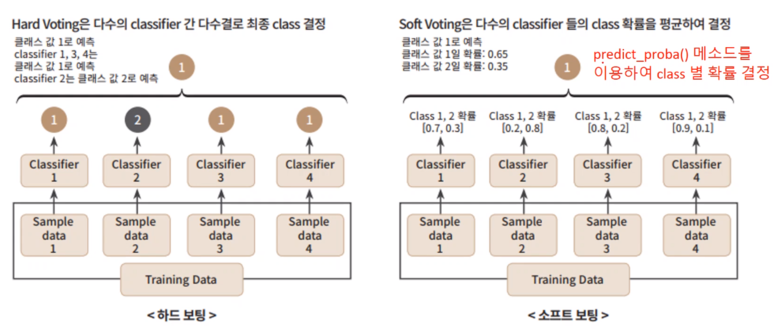
### 배깅(Bagging)
Bootstrap aggregation의 약자로 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과를 집계(Aggregation)하는 방법입니다.

학습 데이터가 충분하지 않더라도 충분한 학습효과를 주어 underfitting, overfitting 문제를 해결하는데 도움을 줍니다.

부트스트랩 : 반복복원추출

대표적인 알고리즘으로는 랜덤 포레스트(Random Forest)가 있습니다.

### 부스팅(boosting)
오분류된 데이터에 초점을 맞추어 더 많은 가중치를 주는 방식입니다. 오분류된 데이터가 가중치를 더 얻게 됨에 따라 더 많이 고려된다.

알고리즘으로는 AdaBoost, Gradient Boosting(XGboost, LightGBM, Catboost)이 있습니다.

### 스태킹(Stacking)
CV(cross validation)기반으로 개별 모델이 예측한 데이터를 다시 훈련 데이터로 사용해서 학습합니다.

현실 모델에서는 적용하는 경우는 많지 않지만, 캐글과 같은 대회에서 조금이라도 성능을 올려야 할 경우 자주 사용된다고 합니다.

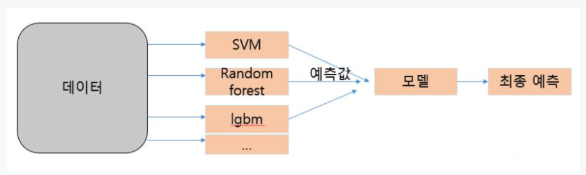




## 랜덤 포레스트
랜덤 포레스트는 결정 트리를 랜덤하게 만들어 학습하고 각 결정 트리의 예측을 사용해 최종 예축을 만듭니다. 부트스트랩 샘플을 이용하여 각 트리를 훈련합니다.

각 노드를 분할할 떄 전체 특성 중에서 일부 특성을 무작위로 고른 다음 이 중에서 최선의 분할을 찾습니다. 

기본적으로 전체 특성 개수의 제곱근만큼의 특성을 선택합니다. 예를 들어 4개의 특성이 있다면 노드마다 2개를 랜덤하게 선택하여 사용합니다. 하지만 회귀 모델인 RandomForestRegressor는 전체 특성을 사용합니다.

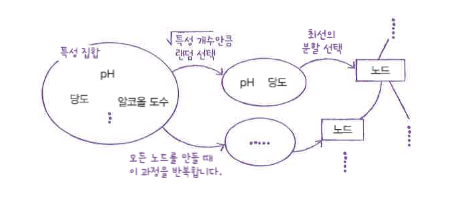

사이킷런의 랜덤 포레스트는 기본적으로 100개의 결정 트리를 이런 방식으로 훈련합니다. 그 다음 분류일 때는 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼습니다. 회귀일 떼는 단순히 각 트리의 예측을 평균합니다.

장점 : 랜덤하게 선택한 샘플과 특성을 사용하기 때문에 훈련 세트에 과대적합되는 것을 막아주고 안정적인 성능을 얻을 수 있습니다.

단점 : 데이터 크기에 비례하여 학습하는데 오랜 시간이 걸립니다. 또한 모든 트리를 확인하기 어렵기 때문에 모델 해석 가능성이 떨어집니다.

In [1]:
# 랜덤 포레스트
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier


In [2]:
wine = pd.read_csv('/Users/ujong-yun/Documents/GitHub/machinelearning-deeplearning/wine.csv')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)


In [3]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs = -1) # return_train_score를 True로 설정하므로서 검증 점수뿐만 아니라 훈련 세트에 대한 점수도 같이 반환
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8903229806766861


In [4]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23183515 0.50059756 0.26756729]


결정 트리의 중요도 = [0.12345626, 0.86862934, 0.0079144]와 비교하면

두 번째 특성인 당도의 중요도가 감소하고 나머지 특성의 중요도가 조금 상승했음을 볼 수 있습니다.

이는 랜덤 포레스트가 특성의 일부를 랜덤하게 선액하여 결정 트리를 훈련하기 때문입니다.

ood_score 매개변수를 True로 지정하므로서 부트스랩 샘플에 포함되지 않고 남은 샘플로 훈련한 결정 트리를 평가할 수 있습니다.

이렇게 하면 랜덤 포레스트는 각 결정 트리의 OOB 점수를 평균하여 출력합니다.


In [5]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)
print(rf.score(test_input, test_target))

0.8945545507023283
0.8907692307692308


## 엑스트라 트리(Extra Trees)
랜덤 포레스트와 매우 비슷하게 동작하지만 에스트라 틀는 부트스트랩 샘플을 사용하지 않습니다.

각 결정 트리를 만들 때 전체 훈련 세트를 사용하지마 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라

무작위로 분할합니다.

랜덤 포레스트에 비해 보통 엑스트라 트리가 무작위성이 좀 더 크기 때문에 랜덤 포레스트보다 더 많은 결정 트리를 훈련해야 합니다.

하지만 랜덤하게 노드를 분할하기 때문에 빠른 걔산 속도가 엑스트라 트리의 장점입니다.


In [6]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [7]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


## 그레디언트 부스팅(gradient boosting)
깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블 하는 방법입니다.

경사 하강법을 사용하여 트리를 앙상블에 추가합니다.

분류에서는 로지스틱 손실 함수를 사용하고 회귀에서는 평균 제곱 오차 함수를 사용합니다.

손실함수의 낮은 곳으로 천천히 조금씩 이동해햐하기 때문에 깊이가 얕은 트리를 사용합니다.


In [8]:
#그레디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [9]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [10]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


## 히스토그램 기반 그레디언트 부스팅(Histogram-based Gradient Boosting)
먼저 입력 특성을 256개의 구간으로 나눕니다. 

따라서 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있습니다.

256개의 구간 중에서 하나를 떼어 놓고 누락된 값을 위해서 사용합니다. 따라서 입력에 누락된 특성이 있더라도 이를 따로 전철리할 필요가 없습니다.



In [11]:
# 히스토그램 기반 그레티언트 부스팅
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9321723946453317 0.8801241948619236


In [12]:
from sklearn.inspection import  permutation_importance
#특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변하는지를 관찰, 어떤 특성이 웅요하진 계산
#특성 중요도를 판단하는 라이브러리
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
# n_repeats 랜덤하게 섞을 횟수, 기본값 5
print(result.importances_mean)


[0.08876275 0.23438522 0.08027708]


In [13]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)


[0.05969231 0.20238462 0.049     ]


In [14]:
hgb.score(test_input, test_target)

0.8723076923076923

In [15]:
#xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state = 42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677
